### Import Libraries

In [3]:
# loading important libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
plt.rcParams["font.size"]=15
pd.set_option("display.max_columns",None)
import pickle

import os
for dirname,_,filenames in os.walk('splitted_data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

splitted_data\X_test.csv
splitted_data\X_train.csv
splitted_data\y_test.csv
splitted_data\y_train.csv


### Data Loading

In [5]:
# loading split data
X_train=pd.read_csv('splitted_data/X_train.csv')
X_test=pd.read_csv('splitted_data/X_test.csv')
y_train=pd.read_csv('splitted_data/y_train.csv')
y_test=pd.read_csv('splitted_data/y_test.csv')

In [6]:
X_train.head()

,Avg Fwd Segment Size,Fwd Packet Length Mean,PSH Flag Count,Fwd Packet Length Min,Min Packet Length,Bwd Packet Length Min,Bwd Packets/s,Flow Packets/s,Fwd Packets/s,Init_Win_bytes_forward,Fwd Packet Length Max,Destination Port,min_seg_size_forward,Total Length of Fwd Packets,Subflow Fwd Bytes,Fwd Packet Length Std,act_data_pkt_fwd,Down/Up Ratio,Total Fwd Packets,Subflow Fwd Packets,Bwd IAT Max,Flow Duration,Flow IAT Max,Flow Bytes/s,ACK Flag Count,Fwd IAT Total,Bwd IAT Std,Average Packet Size,Fwd IAT Max,Fwd Header Length.1
0,0.009747,0.009747,1.0,0.029412,0.030303,0.033149,0.170732,0.108818,0.054409,0.021916,0.002121,0.069908,0.294118,0.000140,0.000140,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,5.067386e-07,6.322796e-07,0.007868,0.0,0.000000,0.000000,0.00301,0.000000,0.000103
1,0.009747,0.009747,1.0,0.029412,0.030303,0.033149,0.142857,0.091051,0.045526,0.021916,0.002121,0.843888,0.294118,0.000140,0.000140,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,6.193472e-07,7.653911e-07,0.006583,0.0,0.000000,0.000000,0.00301,0.000000,0.000103
2,0.009747,0.009747,1.0,0.029412,0.030303,0.033149,0.162791,0.103756,0.051878,0.021916,0.002121,0.676204,0.294118,0.000140,0.000140,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,5.348908e-07,6.655574e-07,0.007502,0.0,0.000000,0.000000,0.00301,0.000000,0.000103
3,0.009747,0.009747,1.0,0.029412,0.030303,0.033149,0.162791,0.103756,0.051878,0.021916,0.002121,0.001650,0.294118,0.000140,0.000140,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,5.348908e-07,6.655574e-07,0.007502,0.0,0.000000,0.000000,0.00301,0.000000,0.000103
4,0.425195,0.425195,1.0,0.000000,0.000000,0.000000,0.000007,0.000005,0.000002,0.175180,0.378579,0.009118,0.176471,0.048938,0.048938,0.454682,0.007778,0.0,0.006066,0.006066,0.210995,9.307997e-02,8.207272e-02,0.000020,0.0,0.023663,0.294506,0.13245,0.019657,0.003899


In [7]:
X_test.head()

,Avg Fwd Segment Size,Fwd Packet Length Mean,PSH Flag Count,Fwd Packet Length Min,Min Packet Length,Bwd Packet Length Min,Bwd Packets/s,Flow Packets/s,Fwd Packets/s,Init_Win_bytes_forward,Fwd Packet Length Max,Destination Port,min_seg_size_forward,Total Length of Fwd Packets,Subflow Fwd Bytes,Fwd Packet Length Std,act_data_pkt_fwd,Down/Up Ratio,Total Fwd Packets,Subflow Fwd Packets,Bwd IAT Max,Flow Duration,Flow IAT Max,Flow Bytes/s,ACK Flag Count,Fwd IAT Total,Bwd IAT Std,Average Packet Size,Fwd IAT Max,Fwd Header Length.1
0,0.029240,0.029240,0.0,0.088235,0.090909,0.000000,0.000000,0.000004,0.000005,0.005495,0.006363,0.001630,0.176471,0.002103,0.002103,0.000000,0.004444,0.0,0.003466,0.003466,0.000000e+00,0.033050,0.039034,5.152073e-07,1.0,3.306962e-02,0.00000,0.004335,3.903426e-02,0.002052
1,0.209552,0.209552,0.0,0.632353,0.651515,0.325967,0.076503,0.048760,0.024380,0.000000,0.045599,0.001073,0.176471,0.006030,0.006030,0.000000,0.001111,0.5,0.000867,0.000867,2.025316e-06,0.000003,0.000002,4.494976e-02,0.0,4.225352e-08,0.00000,0.037176,4.991681e-08,0.000513
2,0.029240,0.029240,0.0,0.088235,0.090909,0.000000,0.000000,0.000015,0.000015,0.005495,0.006363,0.001630,0.176471,0.002103,0.002103,0.000000,0.004444,0.0,0.003466,0.003466,0.000000e+00,0.010008,0.011747,1.701372e-06,1.0,1.001410e-02,0.00000,0.004335,1.174702e-02,0.002052
3,0.034113,0.034113,0.0,0.000000,0.000000,0.000000,0.000003,0.000002,0.000002,0.005495,0.021209,0.001630,0.176471,0.003926,0.003926,0.019723,0.006667,0.0,0.006066,0.006066,3.045215e-02,0.133172,0.120412,4.968258e-05,1.0,1.230831e-01,0.06182,0.585139,1.204124e-01,0.003899
4,0.199805,0.199805,0.0,0.602941,0.621212,0.856354,0.000455,0.000290,0.000145,0.000000,0.043478,0.001073,0.176471,0.005749,0.005749,0.000000,0.001111,0.5,0.000867,0.000867,1.687764e-07,0.000433,0.000512,5.136801e-04,0.0,4.225352e-08,0.00000,0.065172,4.991681e-08,0.000513


In [8]:
y_train.head()

,class
0,2
1,2
2,2
3,2
4,0


In [9]:
y_test.head()

,class
0,1
1,0
2,1
3,1
4,0


# Algorithm:1 SupportVectorClassifier

In [11]:
# importing SVC model and feeding training data
from sklearn.svm import SVC
svc_model=SVC(max_iter=5)
svc_model=svc_model.fit(X_train.values, y_train.values.ravel())

In [12]:
# performing model training
svc_pred=svc_model.predict(X_test.values)
print(svc_pred.tolist())

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

In [13]:
true_labels=y_test.values.ravel()
print(true_labels.tolist())

[1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 

In [14]:
class_labels=['BENIGN', 'DDoS', 'PortScan']
print(class_labels)

['BENIGN', 'DDoS', 'PortScan']


### Result Analysis

***Accuracy Score***

In [17]:
svc_accuracy=accuracy_score(y_true=true_labels,y_pred=svc_pred)
print(f"Validation accuracy of SupportVectorClassifier is {svc_accuracy*100.0:.2f}%")

Validation accuracy of SupportVectorClassifier is 49.54%


***Classification Report***

In [19]:
print(classification_report(y_true=true_labels,y_pred=svc_pred,target_names=class_labels))

              precision    recall  f1-score   support

      BENIGN       0.40      0.98      0.56     10000
        DDoS       1.00      0.50      0.67     10000
    PortScan       0.08      0.00      0.00     10000

    accuracy                           0.50     30000
   macro avg       0.49      0.50      0.41     30000
weighted avg       0.49      0.50      0.41     30000



***Confusion Matrix***

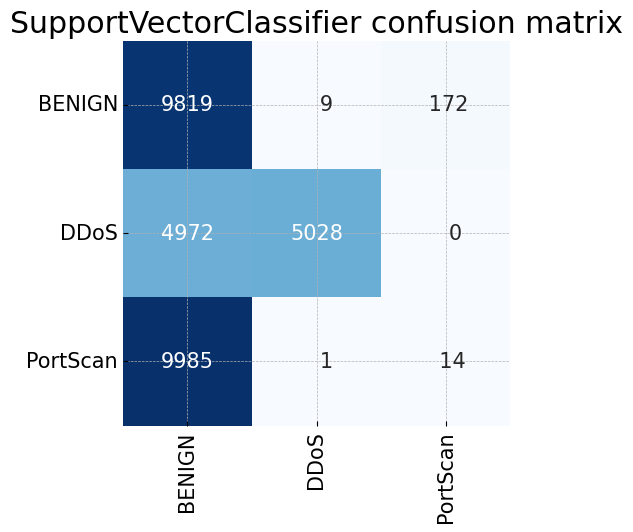

In [21]:
with plt.style.context('bmh'):
    plt.figure(figsize=(5,5))
    plt.rcParams['font.size']=15
    ax=sns.heatmap(data=confusion_matrix(y_true=true_labels,y_pred=svc_pred),
                   xticklabels=class_labels,
                   yticklabels=class_labels,
                   annot=True,
                   fmt='4d',
                   cmap=plt.cm.Blues,
                   cbar=False)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title(label='SupportVectorClassifier confusion matrix')
    plt.show()

***Model Saving***

In [23]:
with open(file='models/SupportVectorClassifier.pkl',mode='wb') as file:
    pickle.dump(obj=svc_model,file=file)

# Algorithm:2 RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=1,min_samples_split=10000,min_samples_leaf=10000,criterion="entropy")
RF_model=RF_model.fit(X_train.values, y_train.values.ravel())

In [26]:
RF_pred=RF_model.predict(X_test.values)
print(RF_pred.tolist())

[1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 

In [27]:
true_labels=y_test.values.ravel()
print(true_labels.tolist())

[1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 

### Result Analysis

***Accuracy Score***

In [30]:
RF_accuracy=accuracy_score(y_true=true_labels,y_pred=RF_pred)
print(f"Validation accuracy of RandomForestClassifier is {RF_accuracy*100.0:.2f}%")

Validation accuracy of RandomForestClassifier is 96.32%


***Classification Report***

In [32]:
print(classification_report(y_true=true_labels,y_pred=RF_pred,target_names=class_labels))

              precision    recall  f1-score   support

      BENIGN       0.98      0.91      0.94     10000
        DDoS       0.94      0.98      0.96     10000
    PortScan       0.97      1.00      0.99     10000

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



***Confusion Matrix***

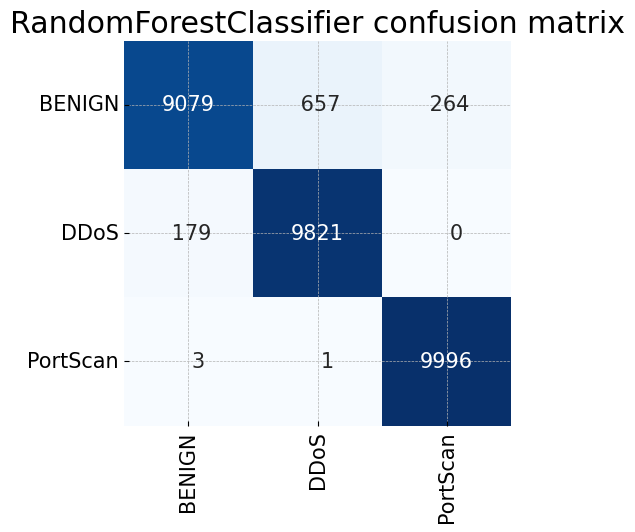

In [34]:
with plt.style.context('bmh'):
    plt.figure(figsize=(5,5))
    plt.rcParams['font.size']=15
    ax=sns.heatmap(data=confusion_matrix(y_true=true_labels,y_pred=RF_pred),
                   xticklabels=class_labels,
                   yticklabels=class_labels,
                   annot=True,
                   fmt='4d',
                   cmap=plt.cm.Blues,
                   cbar=False)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title(label='RandomForestClassifier confusion matrix')
    plt.show()

***Model Saving***

In [36]:
with open(file='models/RandomForestClassifier.pkl',mode='wb') as file:
    pickle.dump(obj=RF_model,file=file)

# Algorithm:2 ArtificialNeuralNetwork

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical

In [39]:
y_train=to_categorical(y_train.values.ravel())
y_test=to_categorical(y_test.values.ravel())

In [40]:
y_train[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [41]:
y_test[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [42]:
model=Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=32,activation='elu',kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=32,activation='elu',kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=3,activation='softmax'))

In [43]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,403 (9.39 KB)

 Trainable params: 2,275 (8.89 KB)

 Non-trainable params: 128 (512.00 B)

In [45]:
number_of_epochs=3
history=model.fit(x=X_train,y=y_train,batch_size=512,epochs=number_of_epochs,validation_data=(X_test,y_test))

Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7399 - loss: 0.7465 - val_accuracy: 0.9802 - val_loss: 0.0943
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9675 - loss: 0.1070 - val_accuracy: 0.9909 - val_loss: 0.0380
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9800 - loss: 0.0688 - val_accuracy: 0.9911 - val_loss: 0.0323


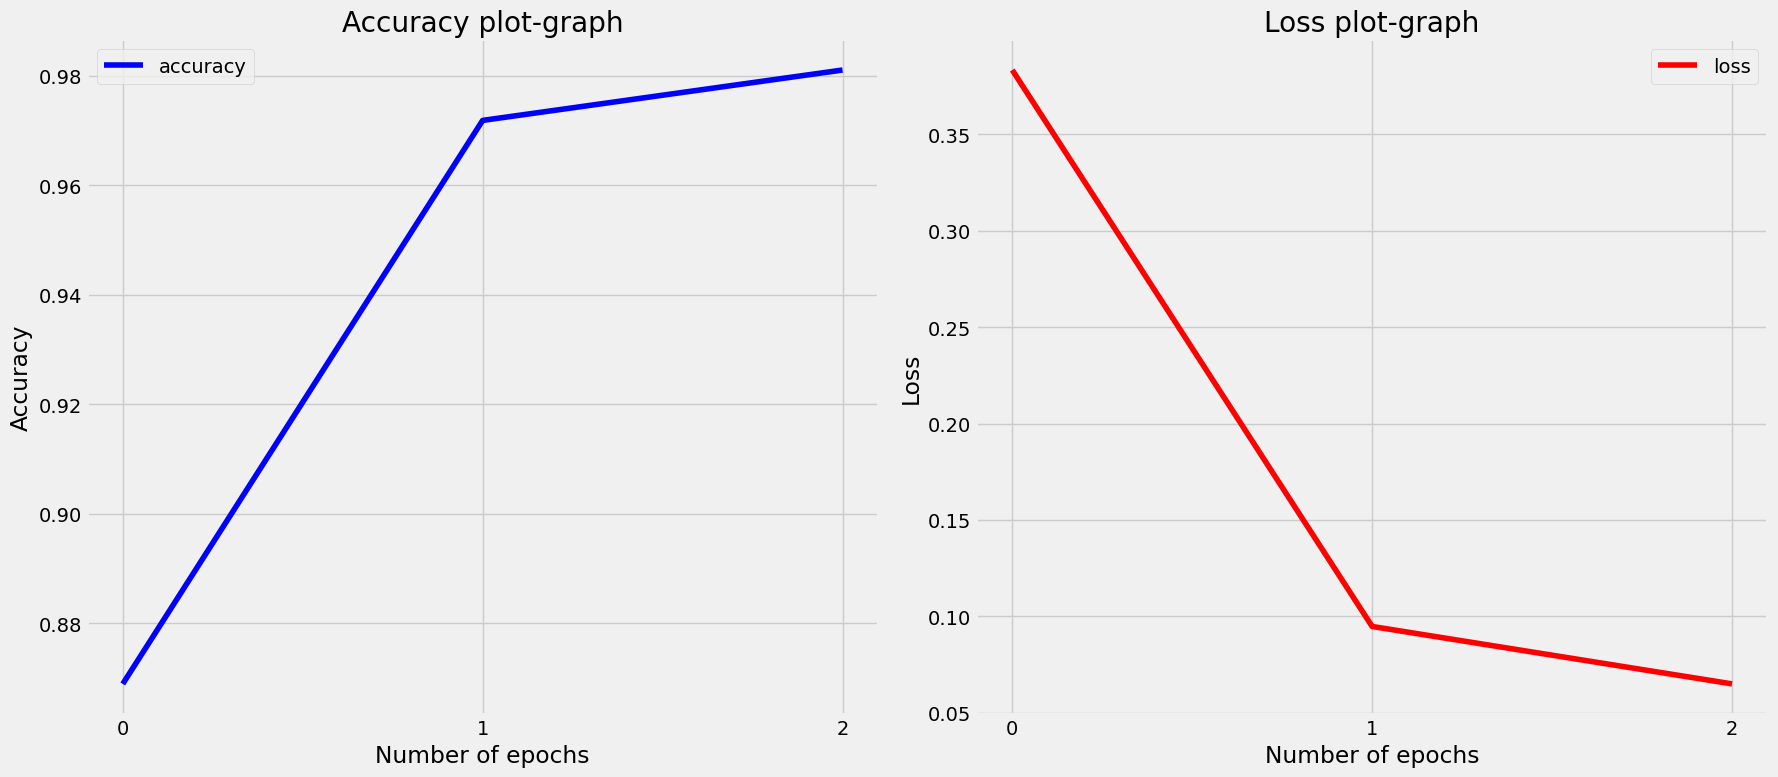

In [46]:
with plt.style.context(style='fivethirtyeight'):
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(18,8))
    axes[0].plot(history.history["accuracy"],label="accuracy",color='blue')
    axes[0].set_title(label='Accuracy plot-graph')
    axes[0].set_xlabel(xlabel='Number of epochs')
    axes[0].set_ylabel(ylabel='Accuracy')
    axes[0].set_xticks(range(number_of_epochs))
    axes[0].legend()
    axes[1].plot(history.history["loss"],label="loss",color='red')
    axes[1].set_title(label='Loss plot-graph')
    axes[1].set_xlabel(xlabel='Number of epochs')
    axes[1].set_ylabel(ylabel='Loss')
    axes[1].set_xticks(range(number_of_epochs))
    axes[1].legend()
    fig.tight_layout()
    plt.show()

In [47]:
model_probs=model.predict(X_test,batch_size=512,verbose=1)
print(model_probs)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[6.4127997e-02 9.3520570e-01 6.6628348e-04]
 [9.9973184e-01 1.6231861e-04 1.0587172e-04]
 [2.2993794e-01 7.6828772e-01 1.7743184e-03]
 ...
 [9.9980587e-01 1.4718984e-04 4.7011516e-05]
 [5.7202304e-04 1.4040162e-04 9.9928755e-01]
 [9.9973446e-01 2.0023376e-04 6.5278553e-05]]


In [48]:
model_pred=np.argmax(model_probs,axis=1)
print(model_pred.tolist())

[1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 

In [49]:
true_labels=np.argmax(y_test,axis=1)
print(true_labels.tolist())

[1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 

### Result Analysis

***Accuracy Score***

In [52]:
ann_accuracy=accuracy_score(y_true=true_labels,y_pred=model_pred)
print(f"Validation accuracy of ArtificialNeuralNetwork is {ann_accuracy*100.0:.2f}%")

Validation accuracy of ArtificialNeuralNetwork is 99.11%


***Classification Report***

In [54]:
print(classification_report(y_true=true_labels,y_pred=model_pred,target_names=class_labels))

              precision    recall  f1-score   support

      BENIGN       1.00      0.98      0.99     10000
        DDoS       0.98      1.00      0.99     10000
    PortScan       0.99      1.00      1.00     10000

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000



***Confusion Matrix***

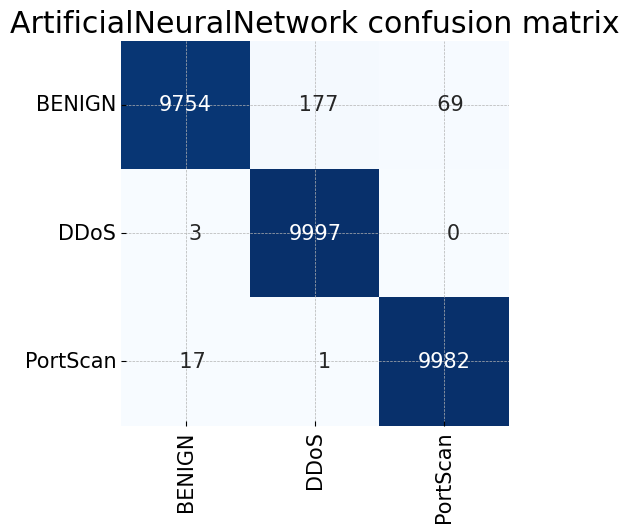

In [56]:
with plt.style.context('bmh'):
    plt.figure(figsize=(5,5))
    plt.rcParams['font.size']=15
    ax=sns.heatmap(data=confusion_matrix(y_true=true_labels,y_pred=model_pred),
                   xticklabels=class_labels,
                   yticklabels=class_labels,
                   annot=True,
                   fmt='4d',
                   cmap=plt.cm.Blues,
                   cbar=False)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title(label='ArtificialNeuralNetwork confusion matrix')
    plt.show()

***Model Saving***

In [58]:
model.save("models/ArtificialNeuralNetwork_model.h5")

---

## End